# MACHINE LEARNNG PROJECT(CHRONIC KIDNEY DISEASE DATABASE)
BY SAAD UR RAHMAN

In [195]:
#imorting libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the dataset
dt=pd.read_csv('ckd.csv')
print(dt.head(3))

#checking how many null values we have do deal with
dt.isnull().sum()

   id   age    bp    sg   al   su     rbc      pc         pcc          ba  \
0   0  48.0  80.0  1.02  1.0  0.0     NaN  normal  notpresent  notpresent   
1   1   7.0  50.0  1.02  4.0  0.0     NaN  normal  notpresent  notpresent   
2   2  62.0  80.0  1.01  2.0  3.0  normal  normal  notpresent  notpresent   

   ...   pcv      wc   rc  htn   dm  cad  appet  pe  ane classification  
0  ...  44.0  7800.0  5.2  yes  yes   no   good  no   no            ckd  
1  ...  38.0  6000.0  NaN   no   no   no   good  no   no            ckd  
2  ...  31.0  7500.0  NaN   no  yes   no   poor  no  yes            ckd  

[3 rows x 26 columns]


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [179]:
#filling null values using simple imputer
from sklearn.impute import SimpleImputer

#mean strategy used for continuous variable
imp1=SimpleImputer(strategy='mean',missing_values=np.nan)

#most_frequest strategy used for categorical variables
imp2=SimpleImputer(strategy='most_frequent',missing_values=np.nan)

dt.iloc[:,1:6]=imp1.fit_transform(dt.iloc[:,1:6])
dt.iloc[:,6:10]=imp2.fit_transform(dt.iloc[:,6:10])
dt.iloc[:,10:19]=imp1.fit_transform(dt.iloc[:,10:19])
dt.iloc[:,19:26]=imp2.fit_transform(dt.iloc[:,19:26])

#checking if all the null values have been filled or not
dt.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [180]:
#encoding non-numerical values
#alloting each category a number
from sklearn.preprocessing import LabelEncoder
for i in [6,7,8,9,19,20,21,22,23,24]:
    le=LabelEncoder()
    dt.iloc[:,i]=le.fit_transform(dt.iloc[:,i])
    
#checking if all non-numerical values have been encoded or not
print(dt.head(3))

   id   age    bp    sg   al   su  rbc  pc  pcc  ba  ...   pcv      wc  \
0   0  48.0  80.0  1.02  1.0  0.0    1   1    0   0  ...  44.0  7800.0   
1   1   7.0  50.0  1.02  4.0  0.0    1   1    0   0  ...  38.0  6000.0   
2   2  62.0  80.0  1.01  2.0  3.0    1   1    0   0  ...  31.0  7500.0   

         rc  htn  dm  cad  appet  pe  ane  classification  
0  5.200000    1   2    0      0   0    0             ckd  
1  4.707435    0   1    0      0   0    0             ckd  
2  4.707435    0   2    0      1   0    1             ckd  

[3 rows x 26 columns]


In [176]:
#splitting data in X and y and train and test data
X=dt.drop('id',axis=1)
X=X.drop('classification',axis=1)
y=dt.classification.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape,y_train.shape)

(320, 24) (320,)


              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        52
      notckd       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



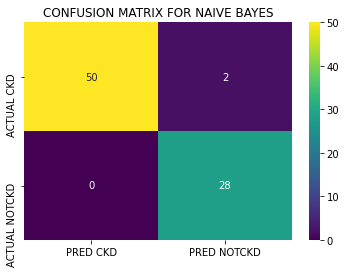

In [182]:
#Training Model and testing it using Naive Bayes
from sklearn.naive_bayes import GaussianNB
c=GaussianNB()
c.fit(X_train,y_train)
y_pred=c.predict(X_test)

#import further classes
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

#printing classification report
print(classification_report(y_test,y_pred))

#storing f1 score in variable
precision,recall,fscore,support=score(y_test,y_pred)
fn1=fscore[0]
fn2=fscore[1]

#Drawing confusion matrix using Seaborn and Heatmap
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['PRED CKD','PRED NOTCKD'],index=['ACTUAL CKD','ACTUAL NOTCKD'])
plt.title('CONFUSION MATRIX FOR NAIVE BAYES')
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.show()

#storing accuracy in variables
as1=accuracy_score(y_test,y_pred)*100

              precision    recall  f1-score   support

         ckd       0.95      0.69      0.80        52
      notckd       0.62      0.93      0.74        28

    accuracy                           0.78        80
   macro avg       0.78      0.81      0.77        80
weighted avg       0.83      0.78      0.78        80



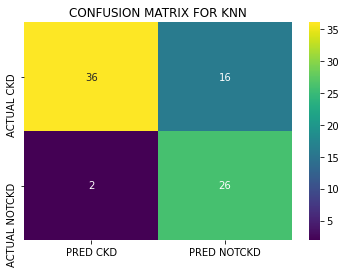

In [183]:
#Training Model and testing it using KNN
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier(n_neighbors=3)
KNC.fit(X_train,y_train)
y_pred2=KNC.predict(X_test)

#classification report
print(classification_report(y_test,y_pred2))

#f1 score
precision,recall,fscore,support=score(y_test,y_pred2)
fk1=fscore[0]
fk2=fscore[1]

#confusion matrix
cm2=pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=['PRED CKD','PRED NOTCKD'],index=['ACTUAL CKD','ACTUAL NOTCKD'])
plt.title('CONFUSION MATRIX FOR KNN')
sns.heatmap(cm2,annot=True,fmt='d',cmap='viridis')
plt.show()

#accuracy score
as2=accuracy_score(y_test,y_pred2)*100

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



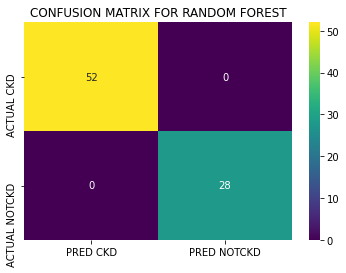

In [184]:
#Training Model and testing it using Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred3=RFC.predict(X_test)

#classification report
print(classification_report(y_test,y_pred3))

#f1 score
precision,recall,fscore,support=score(y_test,y_pred3)
fr1=fscore[0]
fr2=fscore[1]

#confusion matrix
cm3=pd.DataFrame(confusion_matrix(y_test,y_pred3),columns=['PRED CKD','PRED NOTCKD'],index=['ACTUAL CKD','ACTUAL NOTCKD'])
plt.title('CONFUSION MATRIX FOR RANDOM FOREST')
sns.heatmap(cm3,annot=True,fmt='d',cmap='viridis')
plt.show()

#accuracy score
as3=accuracy_score(y_test,y_pred3)*100

              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        52
      notckd       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



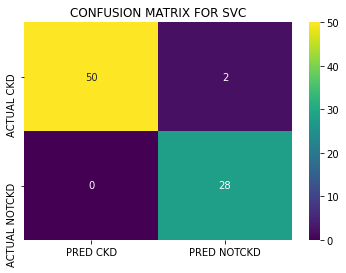

In [185]:
#Training Model and testing it using SVC
from sklearn.svm import SVC
SVC=SVC(kernel='linear')
SVC.fit(X_train,y_train)
y_pred4=SVC.predict(X_test)

#classification report
print(classification_report(y_test,y_pred4))

#f1 score
precision,recall,fscore,support=score(y_test,y_pred4)
fs1=fscore[0]
fs2=fscore[1]

#confusion matrix
cm4=pd.DataFrame(confusion_matrix(y_test,y_pred4),columns=['PRED CKD','PRED NOTCKD'],index=['ACTUAL CKD','ACTUAL NOTCKD'])
plt.title('CONFUSION MATRIX FOR SVC')
sns.heatmap(cm4,annot=True,fmt='d',cmap='viridis')
plt.show()

#accuracy score
as4=accuracy_score(y_test,y_pred4)*100

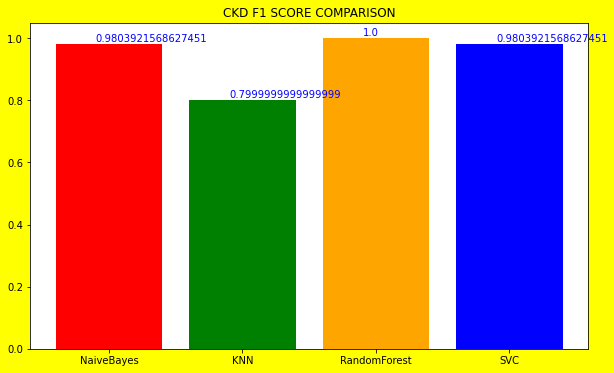

In [169]:
#COMPARING CKD-F1 SCORE BY PLOTTING BAR GRAPH
plt.figure(figsize=(10,6),facecolor='yellow')
plt.title("CKD F1 SCORE COMPARISON")
x1=np.array(['NaiveBayes','KNN','RandomForest','SVC'])#the bar lables
y1=np.array([fn1,fk1,fr1,fs1])#the bar values
c=['red','green','orange','blue']
plt.bar(x1,y1,color=c)
for i,v in enumerate(y1):
    plt.text(i-0.1,v+0.01,str(v),color='blue')
plt.show()
#RandomForest has the best CKD-F1 score

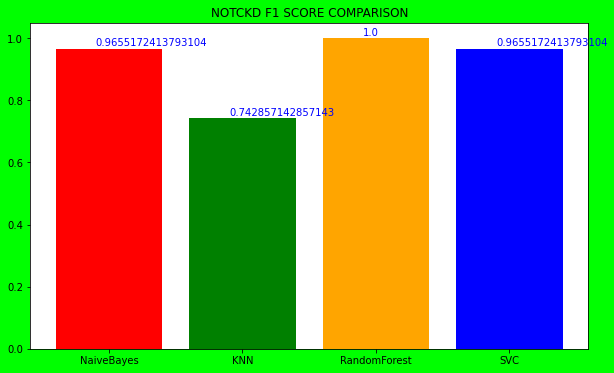

In [190]:
#COMPARING NOTCKD-F1 SCORE BY PLOTTING BAR GRAPH
plt.figure(figsize=(10,6),facecolor='lime')
plt.title("NOTCKD F1 SCORE COMPARISON")
x1=np.array(['NaiveBayes','KNN','RandomForest','SVC'])#the bar lables
y1=np.array([fn2,fk2,fr2,fs2])#the bar values
c=['red','green','orange','blue']
plt.bar(x1,y1,color=c)
for i,v in enumerate(y1):
    plt.text(i-0.1,v+0.01,str(v),color='blue')
plt.show()
#RandomForest has the best NOTCKD-F1 score

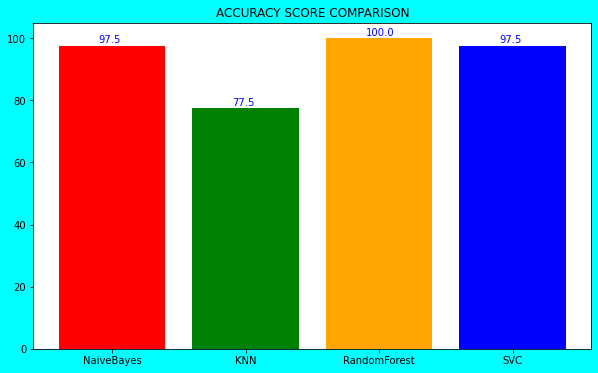

In [189]:
#COMPARING ACCURACY SCORE BY PLOTTING BAR GRAPH
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),facecolor='cyan')
plt.title("ACCURACY SCORE COMPARISON")
x1=np.array(['NaiveBayes','KNN','RandomForest','SVC'])#the bar lables
y1=np.array([as1,as2,as3,as4])#the bar values
c=['red','green','orange','blue']
plt.bar(x1,y1,color=c)
for i,v in enumerate(y1):
    plt.text(i-0.1,v+1,str(v),color='blue')
plt.show()
#RandomForest has the best accuracy score

In [191]:
#After comparing the above results we can conclude that
#model trained by using Random Forest Classifier gives us the most accurate result